In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

# stock data

## Loading data

In [2]:
stock_Brazil=pd.read_csv("Stock major indicies/Bovespa Historical Data_Brazil.csv")

In [3]:
stock_Brazil['Country']='Brazil'

In [5]:
stock_India=pd.read_csv("Stock major indicies/BSE Sensex 30 Historical Data_India.csv")

In [6]:
stock_India['Country']='India'

In [7]:
stock_France=pd.read_csv("Stock major indicies/CAC 40 Historical Data_Paris.csv")

In [8]:
stock_France['Country']='France'

In [9]:
stock_Germany=pd.read_csv("Stock major indicies/DAX Historical Data_Germany.csv")

In [10]:
stock_Germany['Country']='Germany'

In [11]:
stock_US=pd.read_csv("Stock major indicies/Dow Jones Industrial Average Historical Data_US.csv")
# There is two us indexes which should we choose? (S&P 500 Historical Data_US.csv)

In [12]:
stock_US['Country']='US'

In [13]:
stock_UK=pd.read_csv("Stock major indicies/FTSE 100 Historical Data_UK.csv")

In [14]:
stock_UK['Country']='UK'

In [15]:
stock_Italy=pd.read_csv("Stock major indicies/FTSE MIB Historical Data_Italy.csv")

In [16]:
stock_Italy['Country']='Italy'

In [17]:
stock_Spain=pd.read_csv("Stock major indicies/IBEX 35 Historical Data_Spain.csv")

In [18]:
stock_Spain['Country']='Spain'

In [19]:
stock_Korea=pd.read_csv("Stock major indicies/KOSPI Historical Data_South Korea.csv")

In [20]:
stock_Korea['Country']='Korea'

In [21]:
stock_Japan=pd.read_csv("Stock major indicies/Nikkei 225 Historical Data_Japan.csv")

In [22]:
stock_Japan['Country']='Japan'

In [23]:
stock_Denmark=pd.read_csv("Stock major indicies/OMX Copenhagen 20 Historical Data_Denmark.csv")

In [24]:
stock_Denmark['Country']='Denmark'

In [25]:
stock_Australia=pd.read_csv("Stock major indicies/S&P_ASX 200 Historical Data_Austrila.csv")

In [26]:
stock_Australia['Country']='Australia'

In [27]:
stock_Canada=pd.read_csv("Stock major indicies/S&P_TSX Composite Historical Data_Canada.csv")

In [28]:
stock_Canada['Country']='Canada'

In [29]:
stock_China=pd.read_csv("Stock major indicies/Shanghai Composite Historical Data_China.csv")

In [30]:
stock_China['Country']='China'

In [32]:
stock_SouthAfrica=pd.read_csv("Stock major indicies/South-Africa-Top-40-Historical-Data_South-Africa.csv")

In [33]:
stock_SouthAfrica['Country']='South Africa'

In [35]:
stock_data=pd.concat([stock_Brazil,stock_India,stock_France,stock_Germany,stock_US,stock_UK,stock_Italy,stock_Spain,stock_Korea,stock_Japan,stock_Denmark,stock_Australia,stock_Canada,stock_China,stock_SouthAfrica])

In [42]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

##  Checking data

In [43]:
print("Number of obsevations: {}".format(len(stock_data)))

Number of obsevations: 4804


We now take a look at which dates the stock data is available for

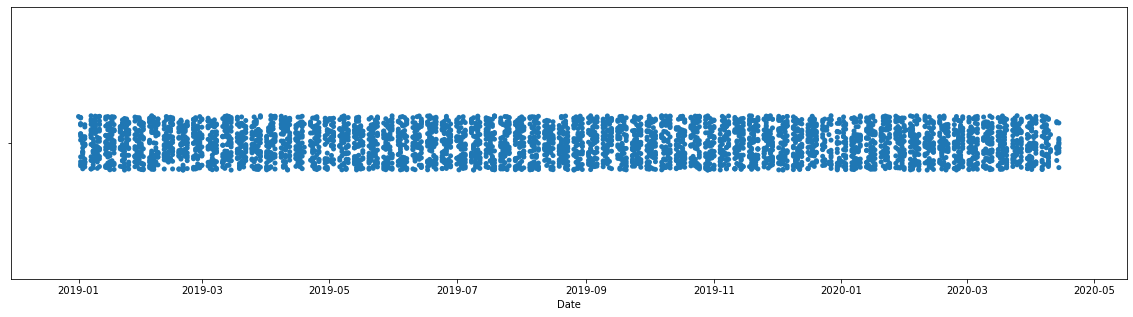

In [45]:
fig,ax =plt.subplots(figsize=(20,5))
ax = sns.stripplot(x=stock_data.Date)

We now take a look at the data which the change for each country

In [71]:
stock_data['Change %']=stock_data['Change %'].apply(lambda x: float(x[:-1]))

In [75]:
countries=list(stock_data.Country.unique())

In [78]:
changes=[]
for country in countries:
    changes.append(stock_data[stock_data.Country==country]["Change %"])

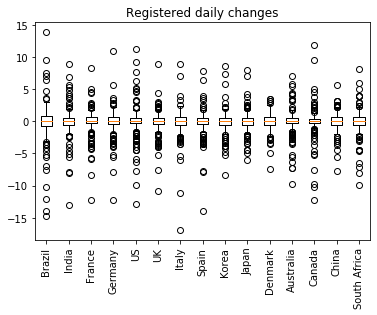

In [106]:
fig, ax = plt.subplots()
ax.set_title('Registered daily changes')
ax.boxplot(changes)
ax.set_xticklabels(countries,rotation=90)
plt.show()

In [103]:
fig = px.line(stock_data.groupby(['Date','Country'])[['Change %']].sum().reset_index(), x="Date", y="Change %", color='Country',title='Daily change in stock index')
fig.show()

In [105]:
fig = px.line(stock_data.groupby(['Date','Country'])[['Price']].sum().reset_index(), x="Date", y="Price", color='Country',title='Daily Price for stock index')
fig.show()

# Industry data

In [107]:
Yiling_pharmacy=pd.read_csv("Industries data/002603 Historical Data_Yiling pharmacy.csv")

In [122]:
Yiling_pharmacy['Company']='Yiling pharmacy'

In [123]:
Yiling_pharmacy

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 14, 2020",31.32,28.50,31.32,27.02,120.80M,10.01%,Yiling pharmacy
1,"Apr 13, 2020",28.47,26.39,28.47,26.02,122.14M,10.01%,Yiling pharmacy
2,"Apr 10, 2020",25.88,24.39,26.27,24.02,103.88M,3.69%,Yiling pharmacy
3,"Apr 09, 2020",24.96,25.00,26.07,24.10,128.72M,3.06%,Yiling pharmacy
4,"Apr 08, 2020",24.22,22.30,24.22,22.22,95.07M,9.99%,Yiling pharmacy
...,...,...,...,...,...,...,...,...
308,"Jan 08, 2019",10.47,10.46,10.50,10.40,2.26M,-0.19%,Yiling pharmacy
309,"Jan 07, 2019",10.49,10.45,10.54,10.39,4.15M,0.96%,Yiling pharmacy
310,"Jan 04, 2019",10.39,10.12,10.43,10.10,3.85M,1.07%,Yiling pharmacy
311,"Jan 03, 2019",10.28,10.36,10.42,10.20,3.76M,-0.48%,Yiling pharmacy


In [109]:
Amazon=pd.read_csv("Industries data/AMZN Historical Data_Amazon.csv")

In [124]:
Amazon['Company']='Amazon'

In [125]:
Amazon

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 13, 2020","2,168.87","2,041.00","2,180.00","2,038.56",6.72M,6.17%,Amazon
1,"Apr 09, 2020","2,042.76","2,045.43","2,053.00","2,017.67",4.66M,-0.01%,Amazon
2,"Apr 08, 2020","2,043.00","2,021.00","2,043.00","2,011.51",3.98M,1.56%,Amazon
3,"Apr 07, 2020","2,011.60","2,017.00","2,035.49","1,998.74",5.11M,0.70%,Amazon
4,"Apr 06, 2020","1,997.59","1,940.56","1,997.59","1,930.13",5.77M,4.77%,Amazon
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019","1,656.58","1,664.69","1,676.61","1,616.61",8.88M,1.66%,Amazon
318,"Jan 07, 2019","1,629.51","1,602.31","1,634.56","1,589.18",7.99M,3.44%,Amazon
319,"Jan 04, 2019","1,575.39","1,530.00","1,594.00","1,518.31",9.18M,5.01%,Amazon
320,"Jan 03, 2019","1,500.28","1,520.01","1,538.00","1,497.11",6.98M,-2.52%,Amazon


In [110]:
Disney=pd.read_csv("Industries data/DIS Historical Data_Disney.csv")

In [126]:
Disney['Company']='Disney'

In [127]:
Disney

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 13, 2020",103.50,104.75,104.75,99.62,17.31M,-0.96%,Disney
1,"Apr 09, 2020",104.50,107.75,107.75,103.61,31.49M,3.39%,Disney
2,"Apr 08, 2020",101.07,100.69,102.31,98.69,22.56M,-0.17%,Disney
3,"Apr 07, 2020",101.24,104.64,105.85,100.29,22.90M,1.67%,Disney
4,"Apr 06, 2020",99.58,97.40,100.16,94.77,20.41M,6.07%,Disney
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019",111.42,111.80,112.56,111.17,8.73M,0.78%,Disney
318,"Jan 07, 2019",110.56,109.91,111.40,109.30,6.71M,0.87%,Disney
319,"Jan 04, 2019",109.61,107.94,110.75,107.25,10.12M,3.08%,Disney
320,"Jan 03, 2019",106.33,108.48,108.65,105.94,10.59M,-2.42%,Disney


In [111]:
McDonald=pd.read_csv("Industries data/MCD Historical Data_McDonald’s.csv")

In [128]:
McDonald['Company']='McDonald'

In [129]:
McDonald

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 13, 2020",180.12,182.61,182.71,176.91,3.18M,-1.95%,McDonald
1,"Apr 09, 2020",183.70,180.50,185.43,179.92,4.90M,3.50%,McDonald
2,"Apr 08, 2020",177.49,175.59,179.39,174.10,5.67M,1.08%,McDonald
3,"Apr 07, 2020",175.59,184.30,184.78,175.16,7.85M,-0.82%,McDonald
4,"Apr 06, 2020",177.04,169.91,177.85,168.24,8.33M,10.42%,McDonald
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019",180.60,181.96,182.29,179.91,2.94M,0.21%,McDonald
318,"Jan 07, 2019",180.22,178.14,181.88,178.14,3.28M,1.09%,McDonald
319,"Jan 04, 2019",178.28,176.03,179.20,175.69,3.19M,1.93%,McDonald
320,"Jan 03, 2019",174.90,175.45,176.45,174.41,3.73M,-0.66%,McDonald


In [113]:
_3M=pd.read_csv("Industries data/MMM Historical Data_3M.csv")

In [130]:
_3M['Company']='3M'

In [131]:
_3M

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 13, 2020",146.40,147.55,148.40,145.36,2.64M,-0.93%,3M
1,"Apr 09, 2020",147.78,148.60,149.63,146.59,4.78M,-0.81%,3M
2,"Apr 08, 2020",148.99,145.96,149.65,144.02,3.07M,3.04%,3M
3,"Apr 07, 2020",144.60,147.57,150.55,144.41,5.50M,2.77%,3M
4,"Apr 06, 2020",140.70,138.50,141.15,136.90,5.64M,5.16%,3M
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019",191.68,193.00,194.11,189.58,2.48M,0.42%,3M
318,"Jan 07, 2019",190.88,191.36,192.30,188.66,2.16M,-0.23%,3M
319,"Jan 04, 2019",191.32,186.75,191.98,186.03,3.00M,4.11%,3M
320,"Jan 03, 2019",183.76,188.28,188.28,182.89,3.36M,-3.77%,3M


In [114]:
Netflix=pd.read_csv("Industries data/NFLX Historical Data_Netflix.csv")

In [132]:
Netflix['Company']='Netflix'

In [133]:
Netflix

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 13, 2020",396.72,371.36,400.40,367.90,11.69M,7.01%,Netflix
1,"Apr 09, 2020",370.72,370.61,372.00,363.05,7.71M,-0.11%,Netflix
2,"Apr 08, 2020",371.12,374.00,377.87,368.38,6.91M,-0.31%,Netflix
3,"Apr 07, 2020",372.28,380.29,381.31,369.50,7.05M,-2.02%,Netflix
4,"Apr 06, 2020",379.96,366.50,380.26,361.88,8.18M,5.03%,Netflix
...,...,...,...,...,...,...,...,...
317,"Jan 08, 2019",320.27,319.98,320.59,308.01,15.36M,1.56%,Netflix
318,"Jan 07, 2019",315.34,302.10,316.80,301.65,18.62M,5.97%,Netflix
319,"Jan 04, 2019",297.57,281.88,297.80,278.54,19.33M,9.72%,Netflix
320,"Jan 03, 2019",271.20,270.20,275.79,264.43,14.97M,1.32%,Netflix


In [115]:
Ryanair=pd.read_csv("Industries data/RYA Historical Data_Ryanair.csv")

In [134]:
Ryanair['Company']='Ryanair'

In [135]:
Ryanair

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 14, 2020",10.16,10.05,10.27,9.93,367.65K,0.79%,Ryanair
1,"Apr 09, 2020",10.08,10.22,10.55,9.95,12.24M,-0.84%,Ryanair
2,"Apr 08, 2020",10.16,10.15,10.40,9.99,2.34M,-1.55%,Ryanair
3,"Apr 07, 2020",10.32,9.85,10.71,9.85,3.45M,5.85%,Ryanair
4,"Apr 06, 2020",9.75,8.77,9.86,8.77,2.72M,14.48%,Ryanair
...,...,...,...,...,...,...,...,...
320,"Jan 08, 2019",10.64,10.40,10.70,10.32,1.43M,-0.28%,Ryanair
321,"Jan 07, 2019",10.67,10.59,10.70,10.35,1.14M,1.04%,Ryanair
322,"Jan 04, 2019",10.56,10.55,10.59,10.36,920.10K,2.13%,Ryanair
323,"Jan 03, 2019",10.34,10.56,10.64,10.32,1.04M,-1.66%,Ryanair


In [118]:
SAS=pd.read_csv("Industries data/SAS Historical Data_SAS.csv")

In [136]:
SAS['Company']='SAS'

In [137]:
SAS

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 14, 2020",5.99,6.20,6.20,5.99,924.53K,1.70%,SAS
1,"Apr 08, 2020",5.89,6.09,6.10,5.86,2.91M,-2.97%,SAS
2,"Apr 07, 2020",6.07,6.16,6.49,6.03,3.49M,-0.41%,SAS
3,"Apr 06, 2020",6.09,6.09,6.20,5.92,1.86M,1.50%,SAS
4,"Apr 03, 2020",6.01,6.09,6.11,5.95,1.17M,-1.31%,SAS
...,...,...,...,...,...,...,...,...
314,"Jan 08, 2019",16.35,16.39,16.75,16.34,487.06K,-0.24%,SAS
315,"Jan 07, 2019",16.39,15.76,16.42,15.70,690.06K,4.26%,SAS
316,"Jan 04, 2019",15.72,15.22,15.74,15.22,288.43K,3.35%,SAS
317,"Jan 03, 2019",15.21,15.08,15.83,15.07,628.44K,0.93%,SAS


In [119]:
Tivoli=pd.read_csv("Industries data/TIV Historical Data_Tivoli.csv")

In [138]:
Tivoli['Company']='Tivoli'

In [139]:
Tivoli

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 14, 2020",614,618,628,610,1.29K,-0.32%,Tivoli
1,"Apr 08, 2020",616,610,618,592,3.94K,0.98%,Tivoli
2,"Apr 07, 2020",610,634,634,600,5.59K,-4.69%,Tivoli
3,"Apr 06, 2020",640,630,660,630,1.85K,2.24%,Tivoli
4,"Apr 03, 2020",626,636,660,626,2.14K,0.00%,Tivoli
...,...,...,...,...,...,...,...,...
314,"Jan 08, 2019",640,624,640,624,0.81K,2.56%,Tivoli
315,"Jan 07, 2019",624,620,628,620,0.53K,-0.95%,Tivoli
316,"Jan 04, 2019",630,624,634,624,0.67K,-0.32%,Tivoli
317,"Jan 03, 2019",632,632,638,628,0.33K,0.00%,Tivoli


In [120]:
Just_eat=pd.read_csv("Industries data/TKWY Historical Data_Just eat take away.csv")

In [140]:
Just_eat['Company']='Just_eat'

In [141]:
Just_eat

,Date,Price,Open,High,Low,Vol.,Change %,Company
0,"Apr 14, 2020",90.02,88.20,91.36,87.38,514.14K,4.67%,Just_eat
1,"Apr 09, 2020",86.00,78.50,86.00,78.50,1.04M,13.70%,Just_eat
2,"Apr 08, 2020",75.64,75.00,77.00,74.42,413.34K,1.01%,Just_eat
3,"Apr 07, 2020",74.88,76.24,79.60,74.04,534.76K,0.46%,Just_eat
4,"Apr 06, 2020",74.54,74.92,76.88,73.24,402.50K,2.70%,Just_eat
...,...,...,...,...,...,...,...,...
322,"Jan 08, 2019",57.60,58.40,58.90,57.50,82.91K,-0.69%,Just_eat
323,"Jan 07, 2019",58.00,57.80,58.40,57.20,88.66K,1.75%,Just_eat
324,"Jan 04, 2019",57.00,56.60,57.80,56.30,101.19K,1.79%,Just_eat
325,"Jan 03, 2019",56.00,57.90,57.90,55.90,86.77K,-3.11%,Just_eat


In [150]:
industry_data=pd.concat([Yiling_pharmacy,Amazon,Disney,McDonald,_3M,Netflix,Ryanair,SAS,Tivoli,Just_eat])

In [151]:
industry_data['Date']=pd.to_datetime(industy_data['Date'])

In [159]:
industry_data['Change %']=industry_data['Change %'].apply(lambda x: float(x[:-1]))

## Checking data

In [153]:
print("Number of obsevations: {}".format(len(industry_data)))

Number of obsevations: 3213


In [154]:
industry_data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Company'], dtype='object')

In [155]:
compaies=list(industry_data.Company.unique())
compaies

['Yiling pharmacy',
 'Amazon',
 'Disney',
 'McDonald',
 '3M',
 'Netflix',
 'Ryanair',
 'SAS',
 'Tivoli',
 'Just_eat']

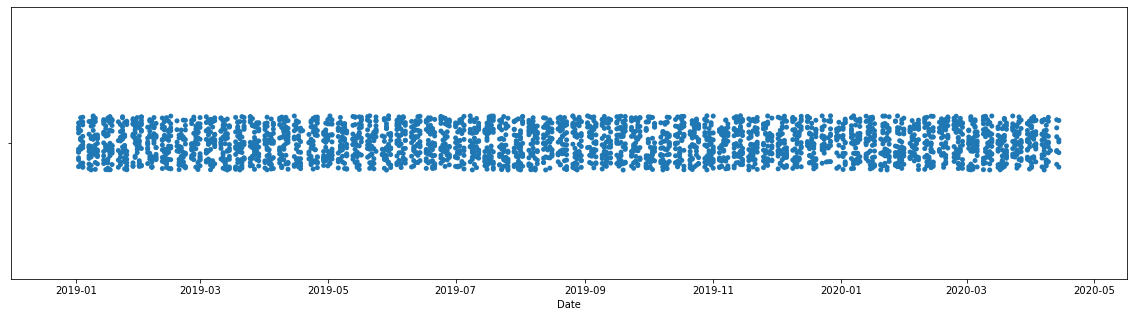

In [156]:
fig,ax =plt.subplots(figsize=(20,5))
ax = sns.stripplot(x=industry_data.Date)

In [161]:
fig = px.line(industry_data.groupby(['Date','Company'])[['Change %']].sum().reset_index(), x="Date", y="Change %", color='Company',title='Daily change in stock index')
fig.show()

In [162]:
fig = px.line(industry_data.groupby(['Date','Company'])[['Price']].sum().reset_index(), x="Date", y="Price", color='Company',title='Daily Price for stock index')
fig.show()

### Covid 19 data

In [36]:
FocusCountries = set(['Brazil','India','US','Italy','Germany','United Kingdom','South Korea','China','Denmark','South Africa','Canada','Australia','Spain','Japan'])

In [ ]:
covid_df = pd.read_csv("Covid-19 data/covid-19-all.csv")
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df['Week'] = covid_df['Date'].dt.to_period('W')
covid_df[['Confirmed','Recovered','Deaths']] = covid_df[['Confirmed','Recovered','Deaths']].fillna(0).astype(int)
recent_date = covid_df['Date'].max()
latest_entry = covid_df[covid_df['Date'] >= recent_date]

In [ ]:
covid_df.head()

In [ ]:
covid_df.tail()

In [ ]:
covid_China_df=covid_df[covid_df['Country/Region']=='China']

In [ ]:
covid_China_df.tail()

In [ ]:
covid_Brazil_df=covid_df[covid_df['Country/Region']=='Brazil']

In [ ]:
covid_Brazil_df.tail()

In [ ]:
latest_entry = covid_df[covid_df['Date'] >= recent_date]
df_stats = covid_df.groupby(['Week','Country'])[['Confirmed','Recovered','Deaths']].sum().reset_index()
df_stats['Week'] = df_stats['Week'].astype(str)

fig = px.line(df_stats, x="Week", y="Confirmed", color='Country',title='Corona Virus Confirmed Count by Week')
fig.show()

fig = px.line(df_stats, x="Week", y="Recovered", color='Country',title='Corona Virus Recovered Count by Week')
fig.show()

fig = px.line(df_stats, x="Week", y="Deaths", color='Country',title='Corona Virus Death Count by Week')
fig.show()